# Predicting with Trees
- Split Variables into groups
- Better performance in nonlinear settings
- Should be used with cross-validation

## Measures of Impurity:
- Missclassification Error:
    - Perfect purity: 0
    - No purity: 0.5
- Gini Index:
    - Perfect purity: 0
    - No purity: 0.5
- Deviance/Information Gain:
    - Perfect purity: 0
    - No purity: 1

## Example of Impurity:
- Splitting a Varibale into 16 with 15:1 ratio
    - Missclassification: 1/16 = 0.6
    - Gini: 1 - [(1/16)^2 + (15/16)^2] = 0.12
    - Information: -[1/16 x log2(1/16) + (15/16) x log2(15/16] = 0.34
- Splitting a Varibale into 16 with 8:8 ratio
    - Missclassification: 8/16 = 0.5
    - Gini: 1 - [(8/16)^2 + (8/16)^2] = 0.5
    - Information: -[8/16 x log2(8/16) + (8/16) x log2(8/16] = 1

## Example with Iris Data

In [1]:
library(caret)
library(ggplot2)
data(iris)
names(iris)

Loading required package: lattice
Loading required package: ggplot2


[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [2]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [3]:
# Data Partition
inTrain <- createDataPartition(y = iris$Species, p = 0.7, list = FALSE)

# Sub-set titanic data to Train and to Test
training <- iris[inTrain, ]
testing <- iris[-inTrain, ]
dim(training)
dim(testing)

[1] 105   5

[1] 45  5

## Plot Petal width vs Sepal width
- 3 distinct groups

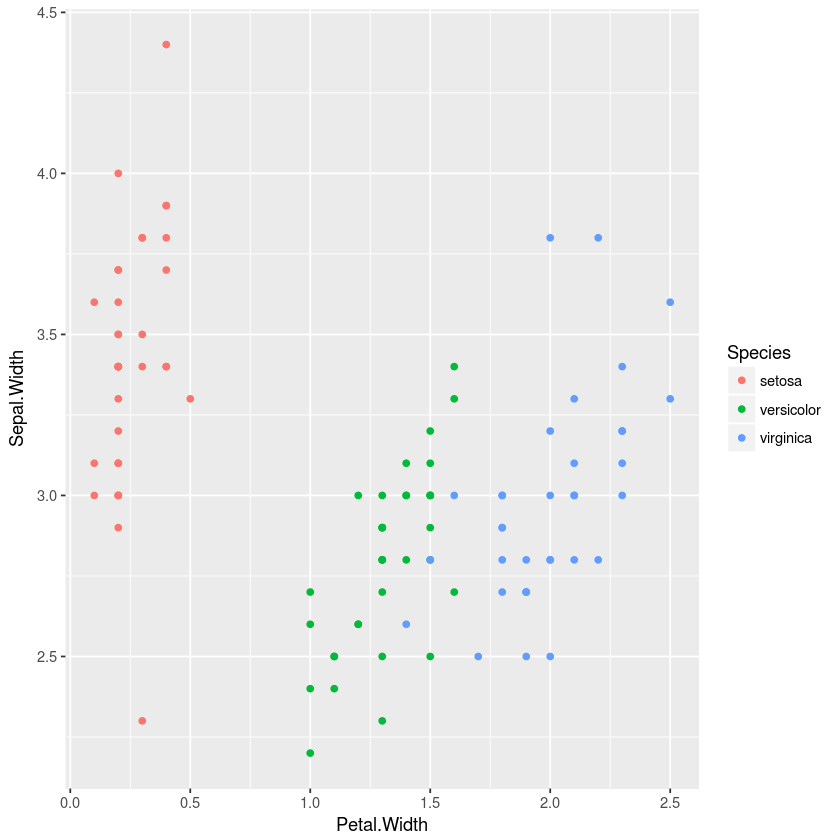

In [4]:
qplot(Petal.Width, Sepal.Width, color = Species, data = training)

## Train a Model

In [5]:
modelFit <- train(Species ~ ., method = "rpart", data = training)
modelFit$finalModel

Loading required package: rpart


n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 35  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 70 35 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.65 38  3 versicolor (0.00000000 0.92105263 0.07894737) *
    7) Petal.Width>=1.65 32  0 virginica (0.00000000 0.00000000 1.00000000) *

## Plot the Tree

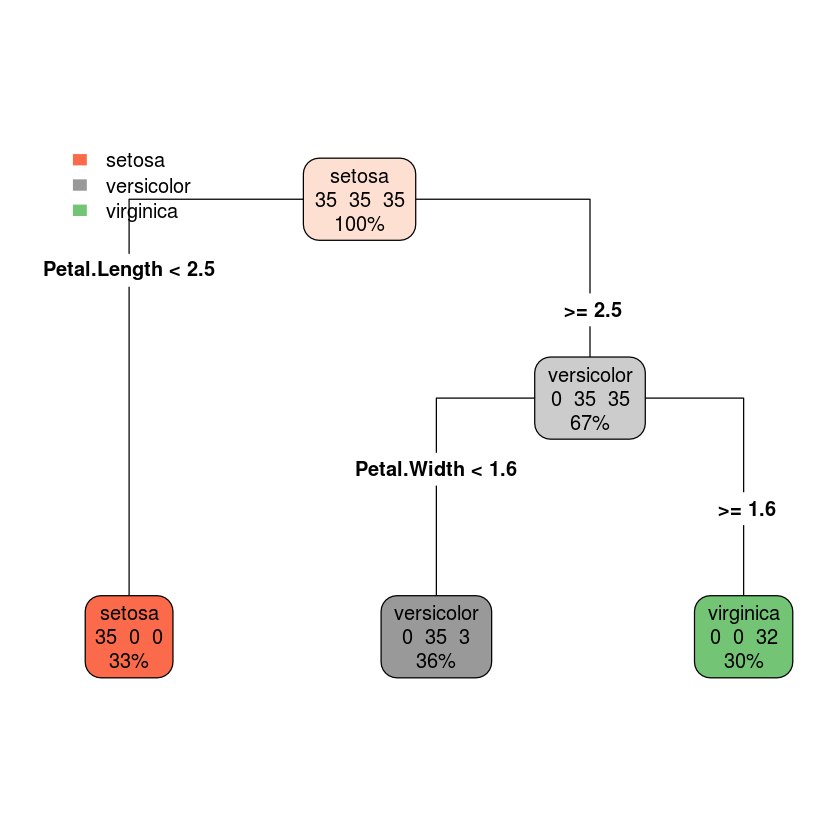

In [11]:
library(rpart.plot)

rpart.plot(modelFit$finalModel, type = 4, extra = 101)

## Predict on Test set

In [7]:
pred <- predict(modelFit, newdata = testing)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor virginica  versicolor
[25] virginica  versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  versicolor virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [8]:
confusionMatrix(testing$Species, pred)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         2
  virginica       0          1        14

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3556         
    P-Value [Acc > NIR] : 5.426e-16      
                                         
                  Kappa : 0.9            
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9286           0.8750
Specificity                 1.0000            0.9355           0.9655
Pos Pred Value              1.0000            0.8667           0.9333
Neg Pred Value              1.0000            0.9667           0.9333
Prevalence                  0.3333            0.3111